In [45]:
import numpy as np
import pandas as pd

In [46]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR



In [47]:
df = pd.read_csv("D:/applied ml material/laptop_prices_10k.csv")
df.head(10)

,Brand,Processor,RAM (GB),Storage (GB),GPU,Screen Size (inches),Battery Life (hours),Price (INR)
0,Dell,Intel i3,4,256,Integrated,14.0,11,38000
1,Lenovo,Intel i3,4,2048,RTX 4090,15.6,5,113000
2,HP,Ryzen 5,16,1024,RTX 4090,15.6,9,132000
3,MSI,Ryzen 7,32,512,GTX 1650,16.0,5,144000
4,Acer,Ryzen 3,4,512,GTX 1650,14.0,8,58000
5,Dell,Intel i7,16,256,RTX 4090,16.0,5,132000
6,HP,Intel i9,4,2048,RTX 4070,13.0,11,153000
7,Lenovo,Intel i3,4,512,RTX 4090,15.6,11,83000
8,Apple,Ryzen 5,4,1024,Integrated,17.0,11,98000
9,Lenovo,Intel i5,4,1024,RTX 4060,16.0,12,93000


In [48]:
df.shape

(10000, 8)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 10000 non-null  object 
 1   Processor             10000 non-null  object 
 2   RAM (GB)              10000 non-null  int64  
 3   Storage (GB)          10000 non-null  int64  
 4   GPU                   10000 non-null  object 
 5   Screen Size (inches)  10000 non-null  float64
 6   Battery Life (hours)  10000 non-null  int64  
 7   Price (INR)           10000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 625.1+ KB


In [50]:
#checking for duplicates in data set
df.duplicated().sum()
#checking for missing values
df.isnull().sum()

Brand                   0
Processor               0
RAM (GB)                0
Storage (GB)            0
GPU                     0
Screen Size (inches)    0
Battery Life (hours)    0
Price (INR)             0
dtype: int64

In [51]:
#performing EDA
import seaborn as sns

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16268\2450433988.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price (INR)'])


<Axes: xlabel='Price (INR)', ylabel='Density'>

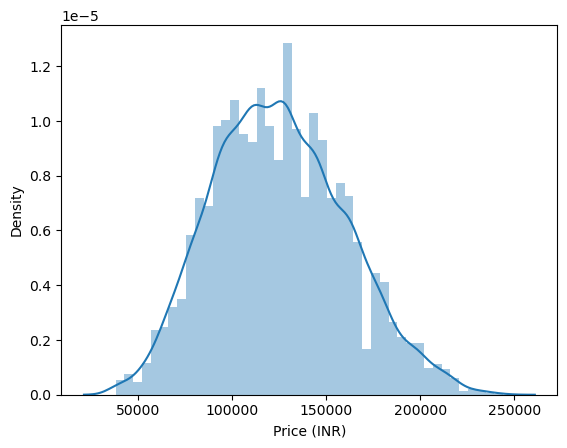

In [52]:
sns.distplot(df['Price (INR)'])


In [53]:
# Calculate Q1, Q3, and IQR
Q1 = df["Price (INR)"].quantile(0.25)
Q3 = df["Price (INR)"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df["Price (INR)"] < lower_bound) | (df["Price (INR)"] > upper_bound)]
print(f"Number of outliers detected: {outliers.shape[0]}")

Number of outliers detected: 22


In [54]:
# Remove outliers from dataset
df_cleaned = df[(df["Price (INR)"] >= lower_bound) & (df["Price (INR)"] <= upper_bound)]

<Axes: xlabel='Brand'>

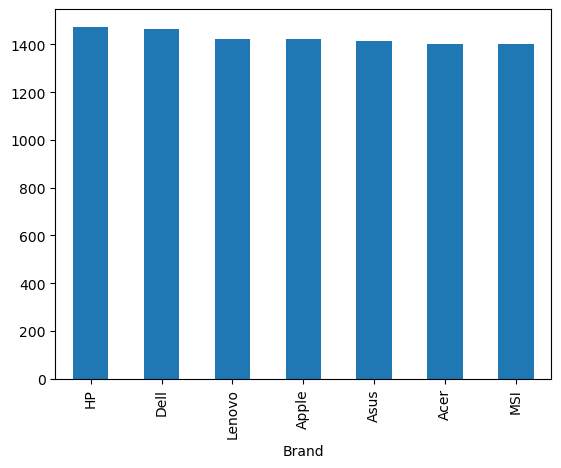

In [55]:
df['Brand'].value_counts().plot(kind='bar')

<Axes: xlabel='Brand', ylabel='Price (INR)'>

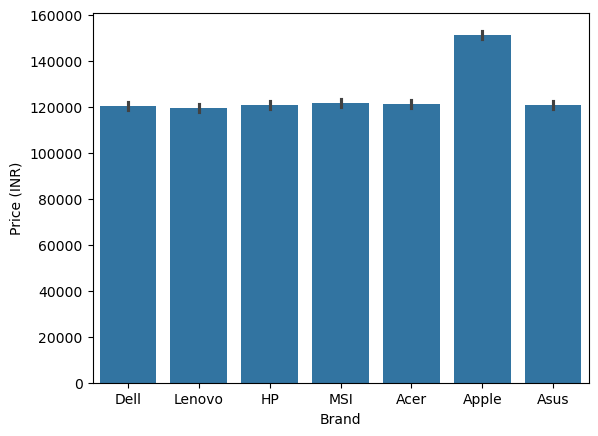

In [56]:
sns.barplot(x=df['Brand'],y=df['Price (INR)'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16268\690891613.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Screen Size (inches)'])


<Axes: xlabel='Screen Size (inches)', ylabel='Density'>

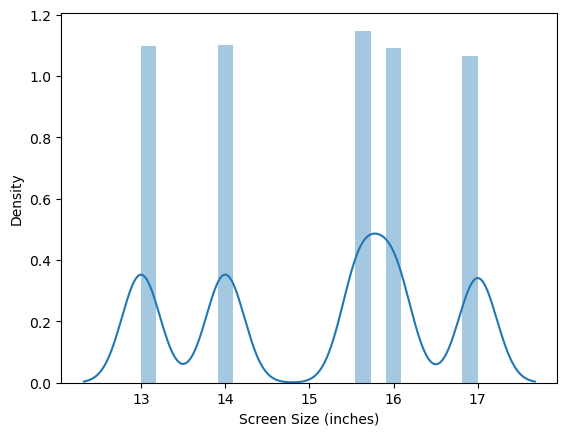

In [57]:
sns.distplot(df['Screen Size (inches)'])

<Axes: xlabel='Screen Size (inches)', ylabel='Price (INR)'>

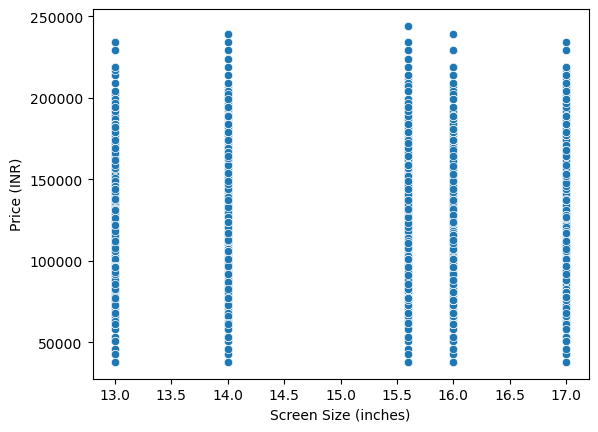

In [58]:
sns.scatterplot(x=df['Screen Size (inches)'],y=df['Price (INR)'])

In [59]:
df['Processor'].value_counts()

Processor
Intel i9    1276
Intel i5    1268
Ryzen 5     1266
Intel i7    1256
Ryzen 3     1252
Ryzen 9     1247
Intel i3    1241
Ryzen 7     1194
Name: count, dtype: int64

In [60]:
def fetch_processor(text):
    if text == 'Intel i7' or text == 'Intel i5' or text == 'Intel i3' or text == 'Intel i9':
        return text
    if text == 'Ryzen 3' or text == 'Ryzen 5' or text == 'Ryzen 7' or text == 'Ryzen 9':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [61]:
df['cpu brand'] = df['Processor'].apply(fetch_processor)
df.head()

,Brand,Processor,RAM (GB),Storage (GB),GPU,Screen Size (inches),Battery Life (hours),Price (INR),cpu brand
0,Dell,Intel i3,4,256,Integrated,14.0,11,38000,Intel i3
1,Lenovo,Intel i3,4,2048,RTX 4090,15.6,5,113000,Intel i3
2,HP,Ryzen 5,16,1024,RTX 4090,15.6,9,132000,Ryzen 5
3,MSI,Ryzen 7,32,512,GTX 1650,16.0,5,144000,Ryzen 7
4,Acer,Ryzen 3,4,512,GTX 1650,14.0,8,58000,Ryzen 3


<Axes: xlabel='cpu brand'>

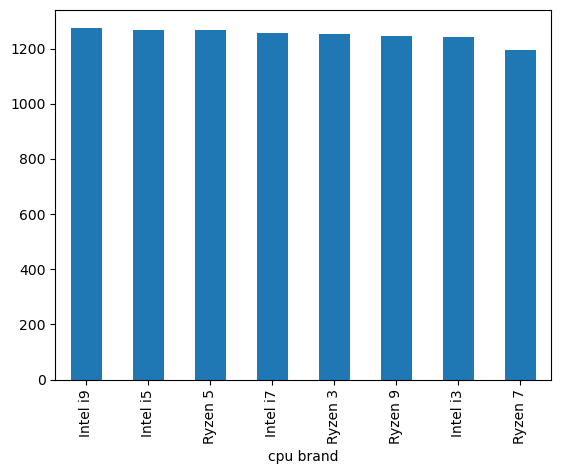

In [62]:
df['cpu brand'].value_counts().plot(kind='bar')

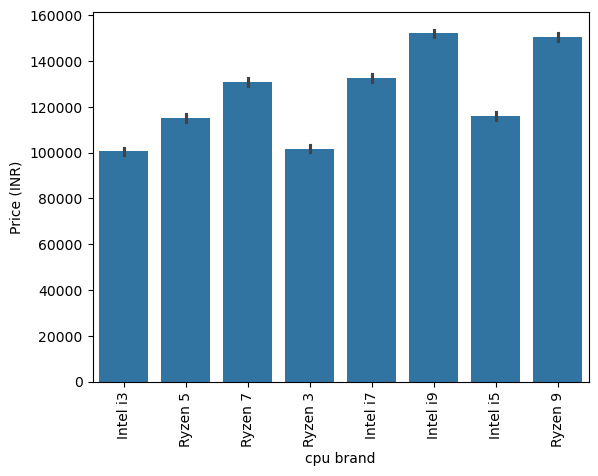

In [63]:
import matplotlib.pyplot as plt
sns.barplot(x=df['cpu brand'],y=df['Price (INR)'])
plt.xticks(rotation = 'vertical')
plt.show()

In [64]:
df.drop(columns=['Processor'],inplace=True)

<Axes: xlabel='RAM (GB)'>

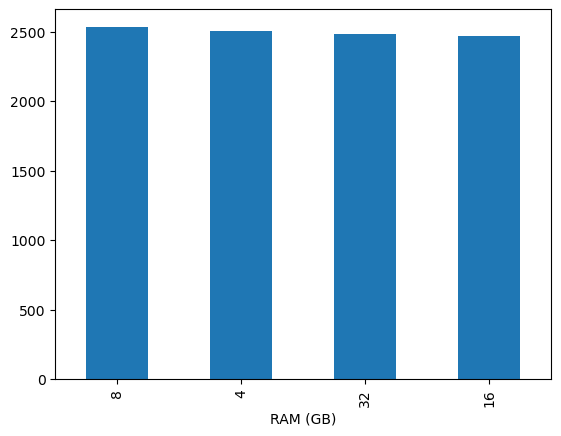

In [65]:
df['RAM (GB)'].value_counts().plot(kind = 'bar')

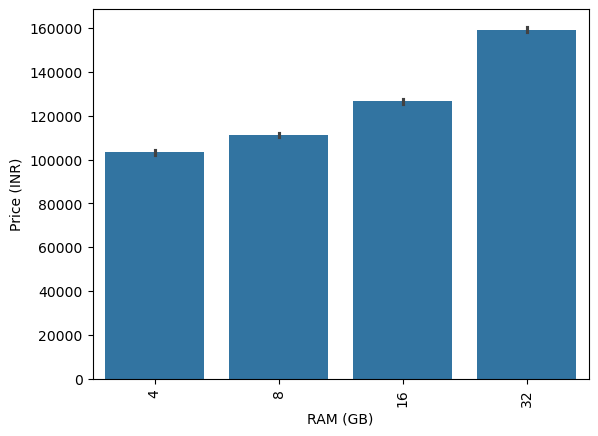

In [66]:
sns.barplot(x=df['RAM (GB)'],y=df['Price (INR)'])
plt.xticks(rotation = 'vertical')
plt.show()

In [67]:
df['Storage (GB)'].value_counts()

Storage (GB)
256     2540
512     2498
1024    2490
2048    2472
Name: count, dtype: int64

In [68]:
df['GPU'].value_counts()

GPU
RTX 4060      1527
Integrated    1467
RTX 4070      1440
GTX 1650      1409
RTX 4080      1388
RTX 3050      1385
RTX 4090      1384
Name: count, dtype: int64

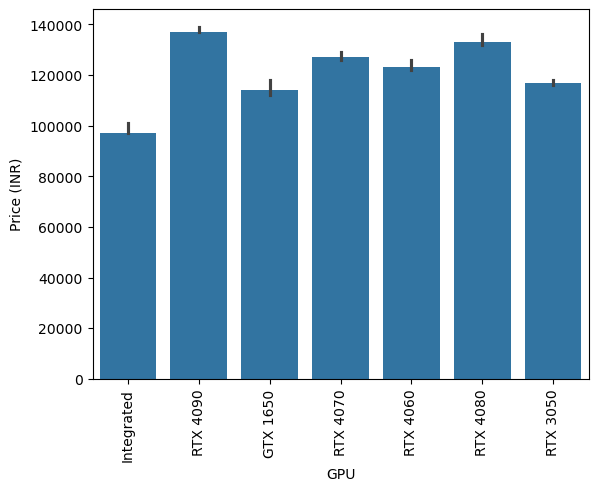

In [69]:
sns.barplot(x=df['GPU'],y=df['Price (INR)'],estimator=np.median)
plt.xticks(rotation = 'vertical')
plt.show()

In [70]:
brand_counts = df.groupby('Brand')['Brand'].count()
print("Total number of Brands:", len(brand_counts))
print("\nNumber of laptops per brand:")
brand_counts

Total number of Brands: 7

Number of laptops per brand:


Brand
Acer      1401
Apple     1421
Asus      1416
Dell      1464
HP        1474
Lenovo    1424
MSI       1400
Name: Brand, dtype: int64

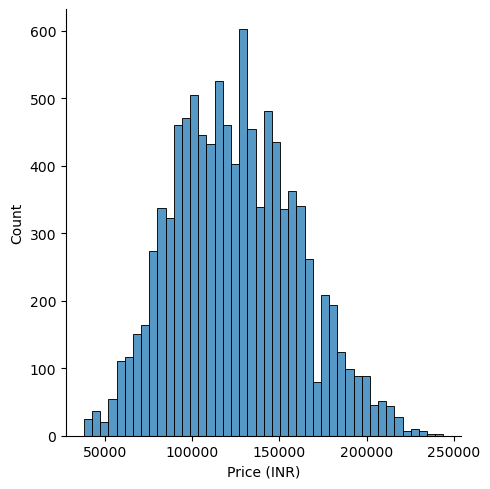

In [71]:
sns.displot(df['Price (INR)'])

The price column appears to be "skewed this can hinder in the performance of our model so we will apply log function to it to make it work better

In [72]:
x = df.drop(columns=['Price (INR)'])
y= np.log(df['Price (INR)'])

In [73]:
x.head()

,Brand,RAM (GB),Storage (GB),GPU,Screen Size (inches),Battery Life (hours),cpu brand
0,Dell,4,256,Integrated,14.0,11,Intel i3
1,Lenovo,4,2048,RTX 4090,15.6,5,Intel i3
2,HP,16,1024,RTX 4090,15.6,9,Ryzen 5
3,MSI,32,512,GTX 1650,16.0,5,Ryzen 7
4,Acer,4,512,GTX 1650,14.0,8,Ryzen 3


In [74]:
y.head()

0    10.545341
1    11.635143
2    11.790557
3    11.877569
4    10.968198
Name: Price (INR), dtype: float64

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=2)

In [76]:
x_train.head()

,Brand,RAM (GB),Storage (GB),GPU,Screen Size (inches),Battery Life (hours),cpu brand
3701,Lenovo,32,1024,RTX 4080,17.0,12,Ryzen 7
4498,Asus,32,1024,GTX 1650,15.6,10,Intel i9
9740,Dell,16,256,RTX 4090,14.0,12,Intel i5
4738,HP,8,512,RTX 4080,15.6,12,Ryzen 7
5378,Acer,32,1024,RTX 4060,13.0,10,Ryzen 7


In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [78]:
x.head()

,Brand,RAM (GB),Storage (GB),GPU,Screen Size (inches),Battery Life (hours),cpu brand
0,Dell,4,256,Integrated,14.0,11,Intel i3
1,Lenovo,4,2048,RTX 4090,15.6,5,Intel i3
2,HP,16,1024,RTX 4090,15.6,9,Ryzen 5
3,MSI,32,512,GTX 1650,16.0,5,Ryzen 7
4,Acer,4,512,GTX 1650,14.0,8,Ryzen 3


we will apply one hot encoding to handle catagorical calumns


In [88]:
#Linear regg.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error

# Define preprocessing for categorical and numerical features
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 3, 6]),  # Encoding categorical features
        ('num_tnf', StandardScaler(), [1, 2, 4, 5])  # Scaling numerical features (RAM, Storage, Screen Size, Battery Life)
    ],
    remainder='passthrough'  # Ensuring all features are used
)

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the model
pipe.fit(x_train, y_train)

# Make predictions
y_pred = pipe.predict(x_test)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.9621442413710173
MAE: 0.039885603793517355


In [87]:
#knn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Define preprocessing for categorical and numerical features
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 3, 6]),  # Encoding categorical features
        ('num_tnf', StandardScaler(), [1, 2, 4, 5])  # Scaling numerical features (RAM, Storage, Screen Size, Battery Life)
    ],
    remainder='passthrough'  # Ensuring all features are used
)

step2 = KNeighborsRegressor(n_neighbors=10)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the model
pipe.fit(x_train, y_train)

# Make predictions
y_pred = pipe.predict(x_test)

# Evaluate the model
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.8600362732626581
MAE: 0.08901069494487536


In [94]:
#svr
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error

# Define preprocessing for categorical and numerical features
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 3, 6]),  # Encoding categorical features
        ('num_tnf', StandardScaler(), [1, 2, 4, 5])  # Scaling numerical features (RAM, Storage, Screen Size, Battery Life)
    ],
    remainder='passthrough'  # Ensuring all features are used
)

step2 = SVR(kernel='rbf', C=10000, epsilon=0.1)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the model
pipe.fit(x_train, y_train)

# Make predictions
y_pred = pipe.predict(x_test)

# Evaluate the model
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.9613287847972554
MAE: 0.05049021426602216


In [95]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))


In [96]:
x_train

,Brand,RAM (GB),Storage (GB),GPU,Screen Size (inches),Battery Life (hours),cpu brand
3701,Lenovo,32,1024,RTX 4080,17.0,12,Ryzen 7
4498,Asus,32,1024,GTX 1650,15.6,10,Intel i9
9740,Dell,16,256,RTX 4090,14.0,12,Intel i5
4738,HP,8,512,RTX 4080,15.6,12,Ryzen 7
5378,Acer,32,1024,RTX 4060,13.0,10,Ryzen 7
...,...,...,...,...,...,...,...
1099,Apple,4,256,RTX 4060,13.0,6,Intel i5
2514,Acer,4,1024,RTX 4080,14.0,5,Ryzen 5
6637,MSI,16,512,GTX 1650,14.0,6,Intel i7
2575,HP,4,512,Integrated,15.6,8,Ryzen 9
